In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from __future__ import division
import numpy as np
import sys
import matplotlib.pyplot as plt


def main():
    """
    This function runs your code for problem 2.

    You can also use this to test your code for problem 1,
    but make sure that you do not leave anything in here that will interfere
    with problem 2. Especially make sure that gmm_est does not output anything
    extraneous, as problem 2 has a very specific expected output.
    """
    file_path = sys.argv[1]

    # YOUR CODE FOR PROBLEM 2 GOES HERE


    # mu_results1, sigma2_results1, w_results1 are all numpy arrays
    # with learned parameters from Class 1
    print 'Class 1'
    print 'mu =', mu_results1, '\nsigma^2 =', sigma2_results1, '\nw =', w_results1

    # mu_results2, sigma2_results2, w_results2 are all numpy arrays
    # with learned parameters from Class 2
    print '\nClass 2'
    print 'mu =', mu_results2, '\nsigma^2 =', sigma2_results2, '\nw =', w_results2


def gmm_est(X, mu_init, sigmasq_init, wt_init, its):
    """
    Input Parameters:
      - X             : N 1-dimensional data points (a 1-by-N numpy array)
      - mu_init       : initial means of K Gaussian components (a 1-by-K numpy array)
      - sigmasq_init  : initial  variances of K Gaussian components (a 1-by-K numpy array)
      - wt_init       : initial weights of k Gaussian components (a 1-by-K numpy array that sums to 1)
      - its           : number of iterations for the EM algorithm

    Returns:
      - mu            : means of Gaussian components (a 1-by-K numpy array)
      - sigmasq       : variances of Gaussian components (a 1-by-K numpy array)
      - wt            : weights of Gaussian components (a 1-by-K numpy array, sums to 1)
      - L             : log likelihood
    """

    # YOUR CODE FOR PROBLEM 1 HERE

    return mu, sigmasq, wt, L


def read_gmm_file(path_to_file):
    """
    Reads either gmm_test.csv or gmm_train.csv
    :param path_to_file: path to .csv file
    :return: two numpy arrays for data with label 1 (X1) and data with label 2 (X2)
    """
    X1 = []
    X2 = []

    data = open(path_to_file).readlines()[1:] # we don't need the first line
    for d in data:
        d = d.split(',')

        # We know the data is either class 1 or class 2
        if int(d[1]) == 1:
            X1.append(float(d[0]))
        else:
            X2.append(float(d[0]))

    X1 = np.array(X1)
    X2 = np.array(X2)

    return X1, X2

if __name__ == '__main__':
    main()


Class 1
mu =

NameError: global name 'mu_results1' is not defined

In [1]:
import scipy.stats as stat

In [2]:
def gmm_est(X, mu_init, sigmasq_init, wt_init, its):
    """
    Input Parameters:
      - X             : N 1-dimensional data points (a 1-by-N numpy array)
      - mu_init       : initial means of K Gaussian components (a 1-by-K numpy array)
      - sigmasq_init  : initial  variances of K Gaussian components (a 1-by-K numpy array)
      - wt_init       : initial weights of k Gaussian components (a 1-by-K numpy array that sums to 1)
      - its           : number of iterations for the EM algorithm

    Returns:
      - mu            : means of Gaussian components (a 1-by-K numpy array)
      - sigmasq       : variances of Gaussian components (a 1-by-K numpy array)
      - wt            : weights of Gaussian components (a 1-by-K numpy array, sums to 1)
      - L             : log likelihood
    """

    # YOUR CODE FOR PROBLEM 1 HERE
    
    #Put this here since I want to use L for each iteration
    L = 0
    for i in range(len(X)):
        acc = 0
        for j in range(len(mu_init)):
            acc += wt_init[j]*stat.norm(mu_init[j],np.sqrt(sigmasq_init[j])).pdf(X[i])
        L+= np.log(acc)
        
    global logs
    logs.append(L)
            
    if its == 0:
        return mu_init, sigmasq_init, wt_init, L
    
    #Calculate the responsibilities of each Gaussian
    #This will be an array of arrays
    gammas = []
    
    for i in range(len(mu_init)):
        gamma = []
        for k in range(len(X)):
            acc = 0
            for j in range(len(mu_init)):
                acc += wt_init[j]*stat.norm(mu_init[j],np.sqrt(sigmasq_init[j])).pdf(X[k])
            gamma.append(float(wt_init[i]*stat.norm(mu_init[i],np.sqrt(sigmasq_init[i])).pdf(X[k]))/acc)
        gammas.append(np.array(gamma))
    
    new_w = []
    new_mu = []
    new_sig = []
    
    for n in range(len(gammas)):
        gamma = float(sum(gammas[n]))
        new_w.append(gamma/len(X))
        new_mu.append(sum(np.array(gammas[n])*X)/gamma)
        new_sig.append(sum(np.array(gammas[n])*(X-new_mu[n])**2)/gamma)
        
    return gmm_est(X,np.array(new_mu),np.array(new_sig), np.array(new_w),its-1)

In [20]:
import pandas as pd
df = pd.read_csv('bitbootcamp/gmm_train.csv')
df.head()

,X_train,Y_train
0,6.3989,1
1,7.1864,1
2,31.3500,1
3,30.1530,1
4,15.0770,1


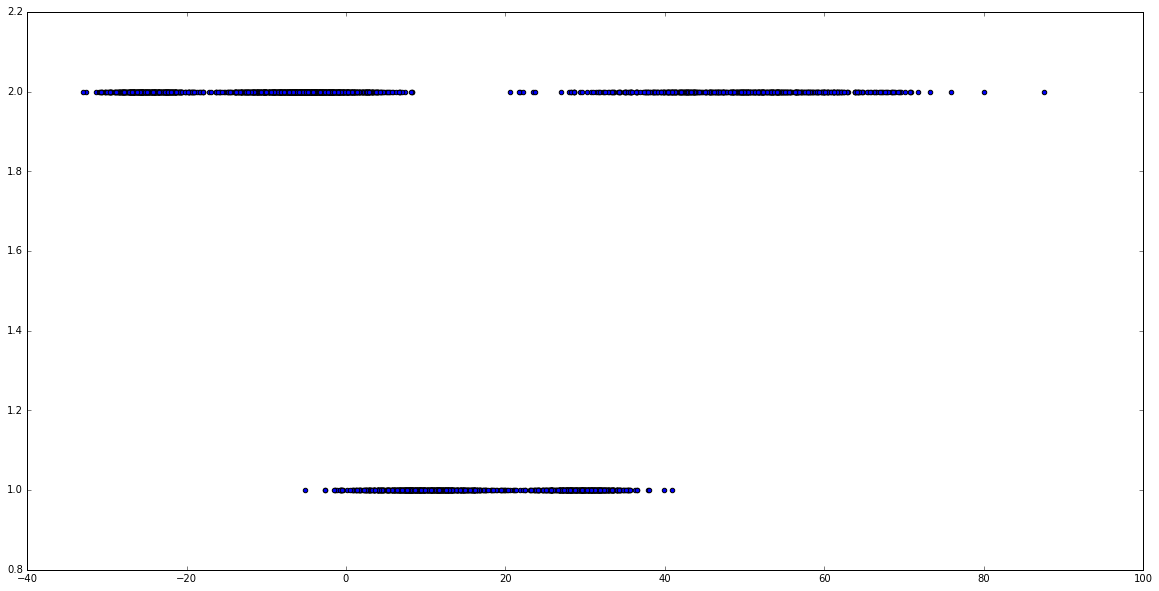

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.scatter(df['X_train'],df[' Y_train'])

In [7]:
X1, X2 = read_gmm_file('bitbootcamp/gmm_train.csv')

In [8]:
print len(X1)
print len(X2)

1000
2000


In [130]:
est1 = gmm_est(X1, np.array([10,30]),np.array([9,9]),np.array([0.75,0.25]),50)
est2 = gmm_est(X2, np.array([-25,-5,50]),np.array([4,9,9,25]),np.array([0.16,0.33,0.51]),50)

In [129]:
logs = []

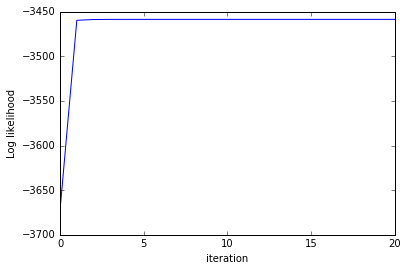

In [346]:
plt.plot(range(21),logs[:21])
plt.ylabel('Log likelihood')
plt.xlabel('iteration')
plt.savefig('likelihood_class1.png')

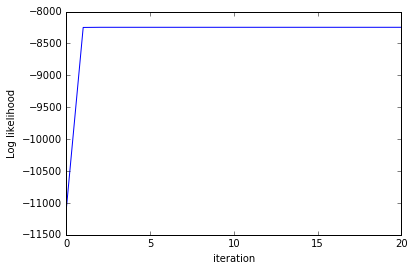

In [345]:
plt.plot(range(21),logs[51:72])
plt.ylabel('Log likelihood')
plt.xlabel('iteration')
plt.savefig('likelihood_class2.png')

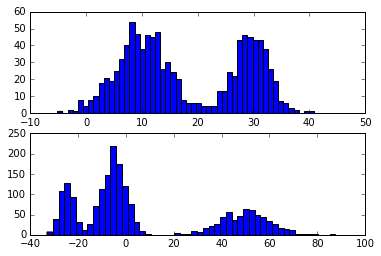

In [83]:
bins = 50
plt.subplot(2,1,1)
plt.hist(X1,50)
plt.subplot(2,1,2)
plt.hist(X2,50)
plt.show()

In [139]:
print est1
print est2

(array([  9.77488592,  29.58258718]), array([ 21.92280456,   9.78376961]), array([ 0.59765463,  0.40234537]), -3458.6952727641597)
(array([-24.82275173,  -5.06015828,  49.62444472]), array([   7.94733541,   23.32266181,  100.0243375 ]), array([ 0.20364946,  0.49884302,  0.29750752]), -8246.0689866275679)


In [140]:
print logs[40:50]
print logs[90:100]

[-3458.6952727641597, -3458.6952727641606, -3458.6952727641597, -3458.6952727641606, -3458.6952727641597, -3458.6952727641606, -3458.6952727641597, -3458.6952727641606, -3458.6952727641597, -3458.6952727641606]
[-8246.0689866275679, -8246.0689866275679, -8246.0689866275679, -8246.0689866275679, -8246.0689866275679, -8246.0689866275679, -8246.0689866275679, -8246.0689866275679, -8246.0689866275679, -8246.0689866275679]


In [4]:
from __future__ import division
import numpy as np
import sys
import matplotlib.pyplot as plt
from gmm_est import gmm_est


def main():
    """
    This function runs your code for problem 3.

    You can use this code for problem 4, but make sure you do not
    interfere with what you need to do for problem 3.
    """
    file_path = sys.argv[1]

    # YOUR CODE FOR PROBLEM 3 GOES HERE

    # class1_data is a numpy array containing
    # all of the data points that your gmm classifier
    # predicted will be in class 1.
    print 'Class 1'
    print class1_data

    # class2_data is a numpy array containing
    # all of the data points that your gmm classifier
    # predicted will be in class 2.
    print '\nClass 2'
    print class2_data


def gmm_classify(X, mu1, sigmasq1, wt1, mu2, sigmasq2, wt2, p1):
    """
    Input Parameters:
        - X           : N 1-dimensional data points (a 1-by-N numpy array)
        - mu1         : means of Gaussian components of the 1st class (a 1-by-K1 numpy array)
        - sigmasq1    : variances of Gaussian components of the 1st class (a 1-by-K1 numpy array)
        - wt1         : weights of Gaussian components of the 1st class (a 1-by-K1 numpy array, sums to 1)
        - mu2         : means of Gaussian components of the 2nd class (a 1-by-K2 numpy array)
        - sigmasq2    : variances of Gaussian components of the 2nd class (a 1-by-K2 numpy array)
        - wt2         : weights of Gaussian components of the 2nd class (a 1-by-K2 numpy array, sums to 1)
        - p1          : the prior probability of class 1.

    Returns:
        - class_pred  : a numpy array containing results from the gmm classifier
                        (the results array should be in the same order as the input data points)
    """

    # YOUR CODE FOR PROBLEM 3 HERE

    return class_pred


def read_gmm_file(path_to_file):
    """
    Reads either gmm_test.csv or gmm_train.csv
    :param path_to_file: path to .csv file
    :return: two numpy arrays for data with label 1 (X1) and data with label 2 (X2)
    """
    X1 = []
    X2 = []

    data = open(path_to_file).readlines()[1:] # we don't need the first line
    for d in data:
        d = d.split(',')

        # We know the data is either class 1 or class 2
        if int(d[1]) == 1:
            X1.append(float(d[0]))
        else:
            X2.append(float(d[0]))

    X1 = np.array(X1)
    X2 = np.array(X2)

    return X1, X2

if __name__ == '__main__':
    main()

ImportError: No module named gmm_est

In [ ]:
import scipy.stats as stat

In [5]:
def gmm_classify(X, mu1, sigmasq1, wt1, mu2, sigmasq2, wt2, p1):
    """
    Input Parameters:
        - X           : N 1-dimensional data points (a 1-by-N numpy array)
        - mu1         : means of Gaussian components of the 1st class (a 1-by-K1 numpy array)
        - sigmasq1    : variances of Gaussian components of the 1st class (a 1-by-K1 numpy array)
        - wt1         : weights of Gaussian components of the 1st class (a 1-by-K1 numpy array, sums to 1)
        - mu2         : means of Gaussian components of the 2nd class (a 1-by-K2 numpy array)
        - sigmasq2    : variances of Gaussian components of the 2nd class (a 1-by-K2 numpy array)
        - wt2         : weights of Gaussian components of the 2nd class (a 1-by-K2 numpy array, sums to 1)
        - p1          : the prior probability of class 1.

    Returns:
        - class_pred  : a numpy array containing results from the gmm classifier
                        (the results array should be in the same order as the input data points)
    """

    # YOUR CODE FOR PROBLEM 3 HERE
    class_pred = []
    for x in X:
        prob1 = 0
        prob2 = 0
        
        for i in range(len(mu1)):
            prob1+=wt1[i]*stat.norm(mu1[i],np.sqrt(sigmasq1[i])).pdf(x)
        for j in range(len(mu1)):
            prob2+=wt2[j]*stat.norm(mu2[j],np.sqrt(sigmasq2[j])).pdf(x)
            
        if p1*prob1>(1-p1)*prob2:
            class_pred.append(1)
        else:
            class_pred.append(2)

    return np.array(class_pred)

In [6]:
test1,test2 = read_gmm_file('bitbootcamp/gmm_test.csv')
C = gmm_classify(np.append(test1,test2),est1[0],est1[1],est1[2],est2[0],est2[1],est2[2],len(X1)/float(len(X1)+len(X2)))

NameError: name 'est1' is not defined

In [306]:
eq = (C == np.append(np.ones(len(test1)),np.ones(len(test2))*2))

In [347]:
print len(filter(lambda x: x,eq))
print len(filter(lambda x: not x, eq))
print len(filter(lambda x: x, eq))/float(len(eq))

1131
369
0.754


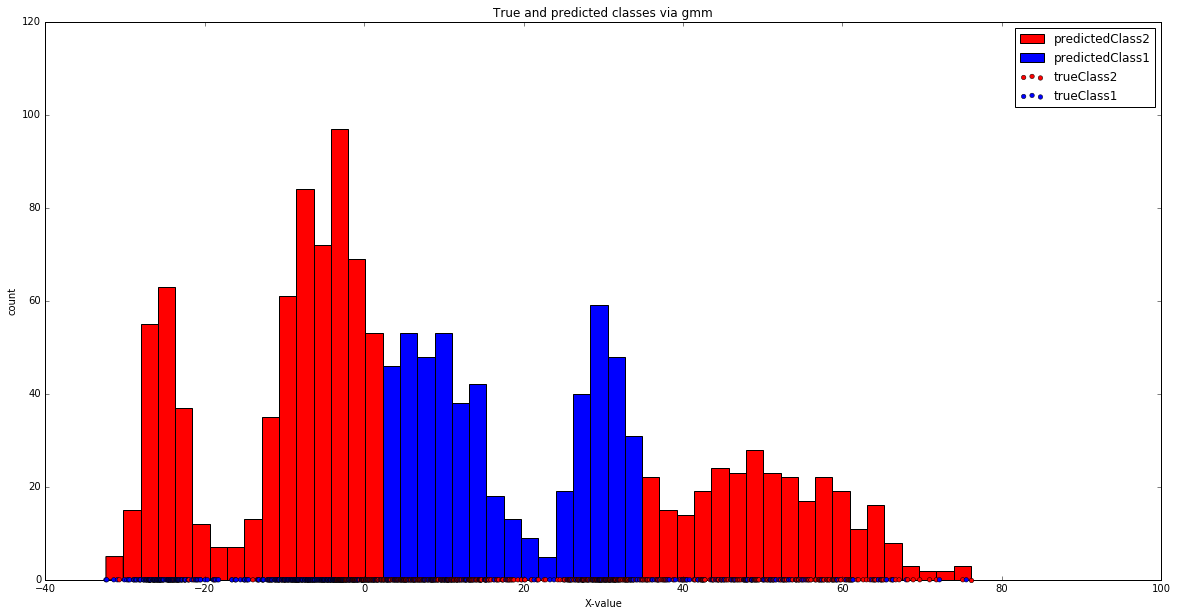

In [344]:
Y1 = np.ones(len(test1))
Y2 = np.ones(len(test2))*2
new_x,new_y = zip(*sorted(zip(np.append(test1,test2),np.append(Y1,Y2))))

plt.figure(figsize=(20,10))
n, bins, patches = plt.hist(new_x,bins = 50)

colors = []
pos = 0
for i in range(len(n)): 
    num_1 = len(filter(lambda x: x==1,new_y[pos:int(pos+n[i])]))
    num_2 = n[i]-num_1

    if (num_1 > num_2):
        colors.append('b')
    else:
        colors.append('r')
        
    pos += int(n[i])

    
for c, p in zip(colors, patches):
    plt.setp(p, 'facecolor', c)
#Doing dumb shit since I don't know how to make legends correctly
s = plt.scatter(new_x[:-1],np.zeros(len(C)-1),20,c=map(lambda x: 'b' if x==1 else 'r',C[:-1]),clip_on=False,zorder=5,linewidth=0.5)
t = plt.scatter(new_x[-1:],np.zeros(1),20,c=map(lambda x: 'b' if x==1 else 'r',C[-1:]),clip_on=False,zorder=5,linewidth=0.5)
plt.ylim(0)
plt.xlabel('X-value')
plt.ylabel('count')
plt.title('True and predicted classes via gmm')
#input this manually since I have no idea how to do so otherwise
plt.legend([patches[0],patches[16],t,s],['predictedClass2','predictedClass1','trueClass2','trueClass1'],loc='upper right')
plt.savefig('Classification.png')